# import library yg dibutuhkan

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# membaca dataset

In [4]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# persiapan dataset 

In [6]:
x = df.drop(['Pregnancies', 'Glucose'], axis=1)

In [7]:
print(x)

     BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  \
0               72             35        0  33.6                     0.627   
1               66             29        0  26.6                     0.351   
2               64              0        0  23.3                     0.672   
3               66             23       94  28.1                     0.167   
4               40             35      168  43.1                     2.288   
..             ...            ...      ...   ...                       ...   
763             76             48      180  32.9                     0.171   
764             70             27        0  36.8                     0.340   
765             72             23      112  26.2                     0.245   
766             60              0        0  30.1                     0.349   
767             70             31        0  30.4                     0.315   

     Age  Outcome  
0     50        1  
1     31        0  
2  

# proses clustering

In [21]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [24]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)


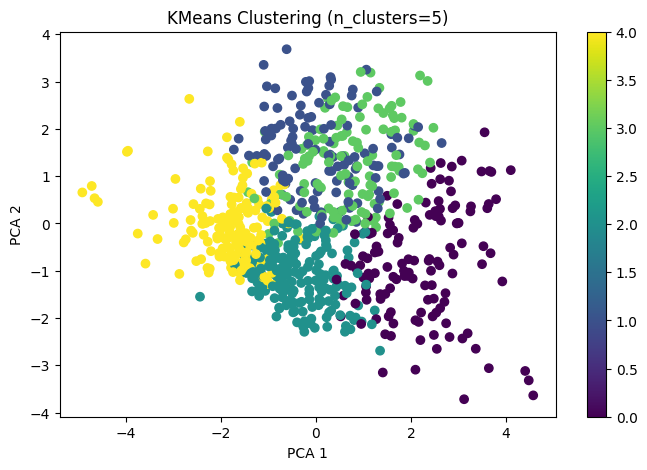

In [25]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(8, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("KMeans Clustering (n_clusters=5)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar()
plt.show()


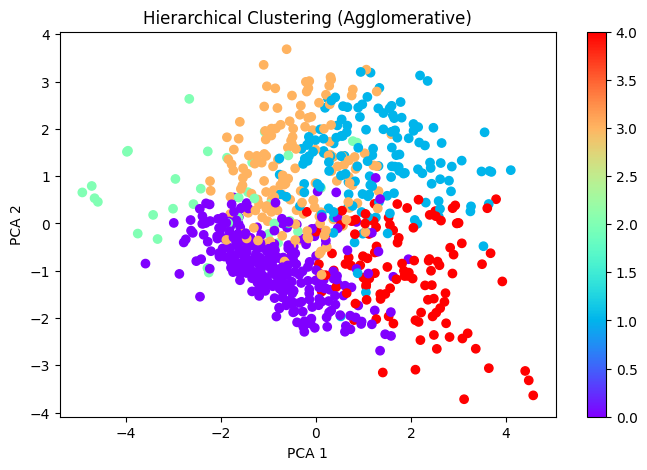

In [27]:
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(scaled_data)

plt.figure(figsize=(8, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=agglo_labels, cmap='rainbow')
plt.title("Hierarchical Clustering (Agglomerative)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar()
plt.show()


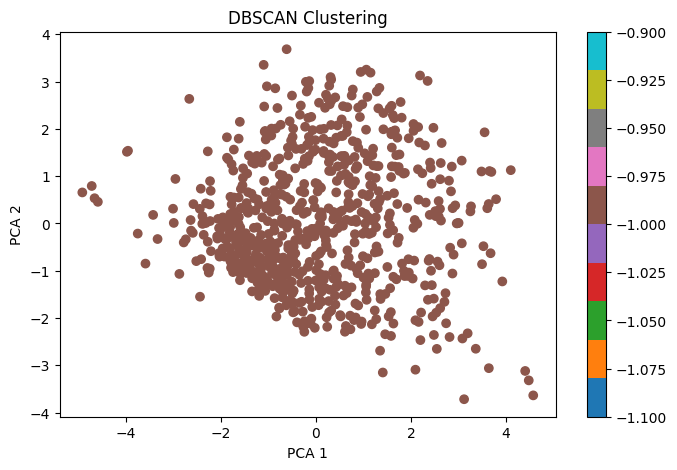

In [31]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

plt.figure(figsize=(8, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='tab10')
plt.title("DBSCAN Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar()

# menentukan jumlah cluster dengan elbow

Text(5, 150000, 'possible elbow point')

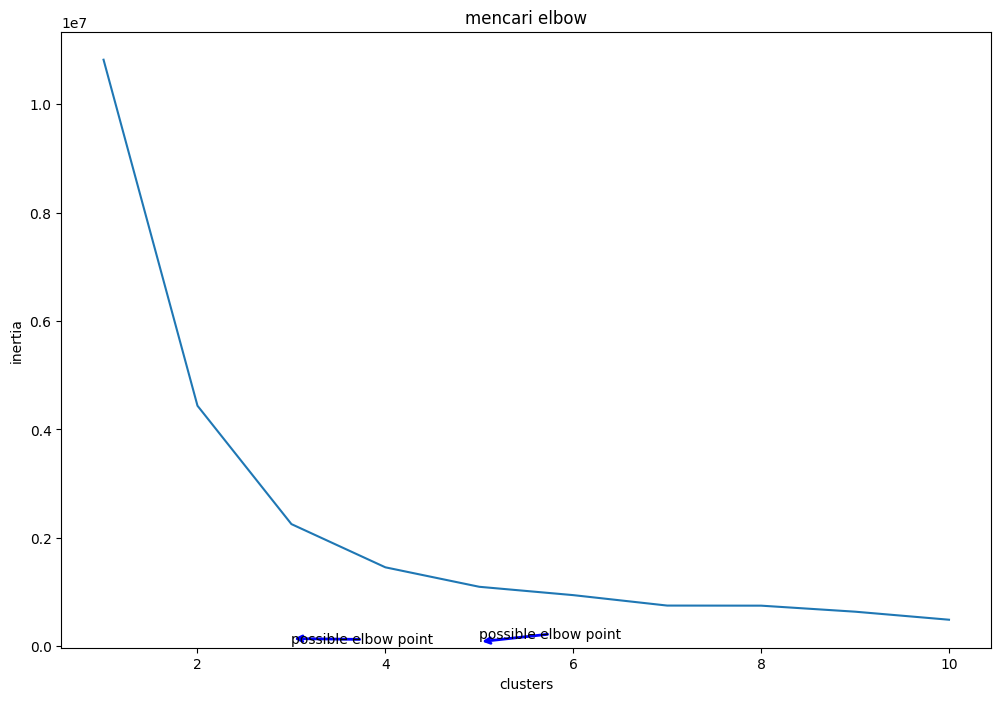

In [8]:
clusters=[]
for i in range(1,11):
    km  =KMeans(n_clusters=i).fit(x)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('mencari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

# panah elbow
ax.annotate('possible elbow point', xy=(3,140000), xytext=(3,50000), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue',lw=2))

ax.annotate('possible elbow point', xy=(5,80000), xytext=(5,150000), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue',lw=2))